# Prepare data for analysis

In [4]:
# Load packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from ete3 import Tree
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
treefile = 'data/chazot_full_tree.nw'
wing = 'forewing'
file = f'data/Morpho_{wing}_procCoor.txt' 

In [6]:
data =  pd.read_csv(file, sep="\t", index_col=False)
with open(treefile, 'r') as file: 
        newick_tree = file.read()
bphylogeny = Tree(newick_tree)

In [7]:
print(bphylogeny)


      /-eugenia
   /-|
  |   \-marcus
  |
  |         /-anaxibia
  |      /-|
  |     |  |   /-cypris
  |     |   \-|
  |     |      \-rhetenor
  |   /-|
--|  |  |      /-cisseis
  |  |  |   /-|
  |  |  |  |   \-hecuba
  |  |  |  |
  |  |   \-|      /-niepelti
  |  |     |   /-|
  |  |     |  |   \-theseus
  |  |      \-|
  |  |        |   /-hercules
   \-|         \-|
     |           |   /-amphitryon
     |            \-|
     |               \-telemachus
     |
     |   /-polyphemus
     |  |
     |  |         /-granadensis
     |  |      /-|
     |  |     |  |   /-achilles
     |  |     |   \-|
      \-|   /-|      \-helenor
        |  |  |
        |  |  |   /-deidamia
        |  |   \-|
        |  |     |   /-epistrophus
        |  |      \-|
        |  |         \-iphitus
         \-|
           |      /-amathonte
           |   /-|
           |  |  |   /-godartii
           |  |   \-|
           |  |      \-menelaus
           |  |
            \-|      /-zephyritis
            

In [8]:
leaves_string = []
for leaf in bphylogeny: 
    leaves_string.append(leaf.name)

(array([804, 805, 806, 807, 808, 809, 810, 815, 816, 817, 818, 819, 820,
       821, 822, 823, 824, 825, 826, 827, 828, 829, 830]),)
ID                   805
Individual     PB13-0919
sex                    M
genus             Morpho
species          eugenia
                 ...    
ProcCoord84    -0.518612
ProcCoord85     0.747343
ProcCoord86    -0.515775
ProcCoord87     0.876981
ProcCoord88    -0.498907
Name: 804, Length: 96, dtype: object


/var/folders/ry/51znrq2s2px_52ndfy4k3kw00000gn/T/ipykernel_59520/1121113369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5


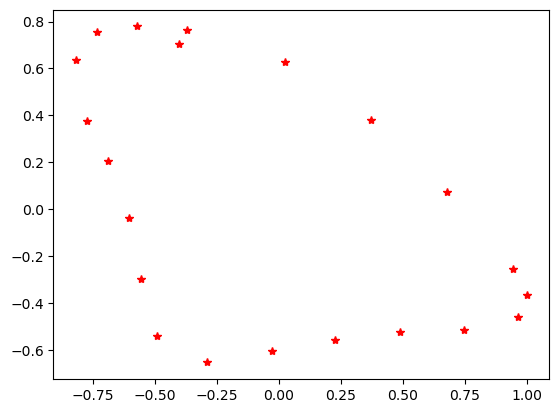

In [9]:
landmark_sele =[0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 8, 24]
indices = np.where(data.species==leaves_string[0])
print(indices)
selected = data.iloc[indices[0][0],:]
selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5
species = selected.species
print(selected)
cur_leaf = np.array(selected.iloc[8::])
#print(species)
#plt.plot(cur_leaf[::2], cur_leaf[1::2], '*', color='black')
#plt.show()
plt.plot(cur_leaf[::2][landmark_sele], cur_leaf[1::2][landmark_sele], '*', color='red')

In [10]:
leaves_data=[]
landmark_sele =[0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 24]

for leaf in leaves_string:
    print(leaf)
    indices = np.where(data.species==leaf)
    selected = data.iloc[indices[0][0],:]
    selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5
    species = selected.species
    cur_leaf = np.array(selected.iloc[8::])
    print(cur_leaf[::2][landmark_sele])
    print(cur_leaf[1::2][landmark_sele])
    leaves_data.append(np.array(list(zip(cur_leaf[::2][landmark_sele], cur_leaf[1::2][landmark_sele]))).flatten())

eugenia
[-0.732626 -0.8169385 -0.7727934999999999 -0.6870345 -0.604715 -0.555983
 -0.4918955 -0.28991849999999997 -0.026343 0.22907650000000002 0.488224
 0.7473430000000001 0.9642765 1.00083 0.9460409999999999 0.6804995
 0.37229650000000003 0.025076 -0.368958 -0.569707]
[0.7544295 0.6375925 0.3746025 0.20538649999999997 -0.0362655 -0.296413
 -0.541412 -0.654261 -0.605556 -0.556826 -0.524409 -0.5157745 -0.461214
 -0.3677565 -0.254698 0.071974 0.38023250000000003 0.629385 0.762236
 0.7789155000000001]
marcus
[-0.8136525 -0.858333 -0.737606 -0.6511555 -0.552986 -0.5070915 -0.4717865
 -0.2909895 -0.028094499999999998 0.2308675 0.4919595 0.7527929999999999
 0.9745905 1.03225 0.9306295 0.6537850000000001 0.3580025 0.0218995
 -0.37681600000000004 -0.585422]
[0.7522785 0.6046195 0.39094850000000003 0.22078899999999999 -0.0273785
 -0.294389 -0.5335734999999999 -0.632325 -0.595086 -0.5562545 -0.535364
 -0.5277525000000001 -0.4928315 -0.4189965 -0.2654105 0.05225 0.3734775
 0.640329 0.7885955 0.8

/var/folders/ry/51znrq2s2px_52ndfy4k3kw00000gn/T/ipykernel_59520/4164159670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5


In [11]:
np.array(leaves_data).shape

(30, 40)

In [12]:
dataframe = pd.DataFrame(np.array(leaves_data).T, columns=leaves_string)
#pd.DataFrame.to_csv(dataframe, 'forewing_data.csv', index=False)

# Visualize wings in chazot data

In [16]:
forewing = np.array(pd.read_csv('data/forewing_data.csv', delimiter=','))

In [17]:
forewing[:,1]==forewing[:,2]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

0
[-0.732626   0.7544295 -0.8169385  0.6375925 -0.7727935  0.3746025
 -0.6870345  0.2053865 -0.604715  -0.0362655 -0.555983  -0.296413
 -0.4918955 -0.541412  -0.2899185 -0.654261  -0.026343  -0.605556
  0.2290765 -0.556826   0.488224  -0.524409   0.747343  -0.5157745
  0.9642765 -0.461214   1.00083   -0.3677565  0.946041  -0.254698
  0.6804995  0.071974   0.3722965  0.3802325  0.025076   0.629385
 -0.368958   0.762236  -0.569707   0.7789155]
1
[-0.8136525  0.7522785 -0.858333   0.6046195 -0.737606   0.3909485
 -0.6511555  0.220789  -0.552986  -0.0273785 -0.5070915 -0.294389
 -0.4717865 -0.5335735 -0.2909895 -0.632325  -0.0280945 -0.595086
  0.2308675 -0.5562545  0.4919595 -0.535364   0.752793  -0.5277525
  0.9745905 -0.4928315  1.03225   -0.4189965  0.9306295 -0.2654105
  0.653785   0.05225    0.3580025  0.3734775  0.0218995  0.640329
 -0.376816   0.7885955 -0.585422   0.8044165]
2
[-0.7706685  0.7110905 -0.8616655  0.617014  -0.7674015  0.3738235
 -0.657704   0.221039  -0.595173  -0.0

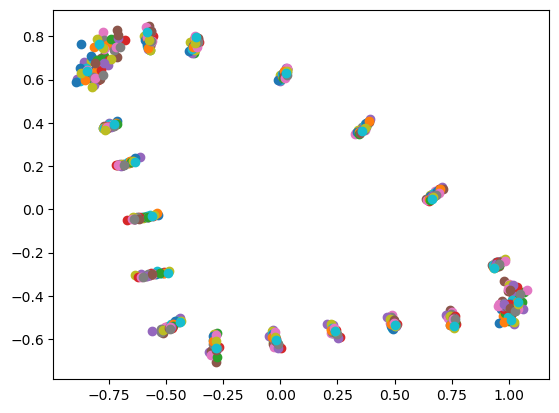

In [18]:
for i in range(forewing.shape[1]):
    print(i)
    wing = forewing[:,i]
    print(wing)
    plt.plot(wing[::2], wing[1::2], 'o')